In [1]:
import os
import numpy as np
import random
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import MNISTClassifier
import envs
import agents_maml
import maml

import matplotlib.pyplot as plt

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
random.seed(random_seed)

In [2]:
## Setting up the environment

In [3]:
model_name = 'model_2'
models = ['model_1','model_4','model_3']
env = envs.SUTEnv(model_name)

In [4]:
test_model = MNISTClassifier.load_model(model_name)
testset_path = "sample_test_set"
testset = np.load(testset_path+"_data.npy") #[Num Samples, 1, 1, 28, 28]
testset_labels = np.load(testset_path+"_labels.npy")
losses, sim_log = MNISTClassifier.test_sample(test_model.cuda(), testset, testset_labels)


Test set: Avg. loss: 80.9982, Accuracy: 17/50 (34%)



/home/bernard/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [5]:
agent = agents_maml.AgentMAML(env.n_actions)
hidden = (Variable(torch.zeros(1, 1, 50).float()), Variable(torch.zeros(1, 1, 50).float()))


In [6]:
meta_trainer = maml.Meta(models, model_name)

In [7]:
max_iters = 50
num_succ = 0
succ_rate = []
meta_trainer.forward()

Training finished


In [8]:
rate, env = meta_trainer.finetunning()

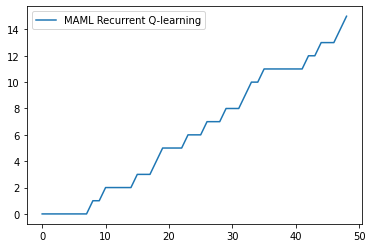

In [9]:
plt.plot(rate, label='MAML Recurrent Q-learning')
plt.legend()

In [10]:
env.action_log

[(17, True, 0.9198107719421387),
 (2, False, 1.8666114807128906),
 (0, False, 1.5941133499145508),
 (0, False, 1.5941133499145508),
 (7, False, 2.8271071910858154),
 (2, False, 1.8666114807128906),
 (37, False, 3.161377429962158),
 (7, False, 2.8271071910858154),
 (43, False, 1.6240735054016113),
 (47, True, 0.05294322967529297),
 (27, False, 2.5721116065979004),
 (24, True, 0.002574920654296875),
 (34, False, 1.6524832248687744),
 (18, False, 1.7573928833007812),
 (45, False, 1.8240303993225098),
 (6, False, 1.9908374547958374),
 (20, True, 1.496614694595337),
 (0, False, 1.5941133499145508),
 (18, False, 1.7573928833007812),
 (20, True, 1.496614694595337),
 (20, True, 1.496614694595337),
 (4, False, 1.7537039518356323),
 (38, False, 2.084350824356079),
 (7, False, 2.8271071910858154),
 (39, True, 0.026421546936035156),
 (34, False, 1.6524832248687744),
 (30, False, 1.7280778884887695),
 (16, True, 1.5225410461425781),
 (13, False, 1.6910831928253174),
 (15, False, 3.2130184173583984)

In [11]:
plot_maml = []
visited = []
num_fails = 0
total_reward = 0
for val in env.action_log:
    if val[1] == False and val[0] not in visited:
        num_fails += 1
    visited.append(val[0])
    plot_maml.append(num_fails)
    total_reward += val[2]
    

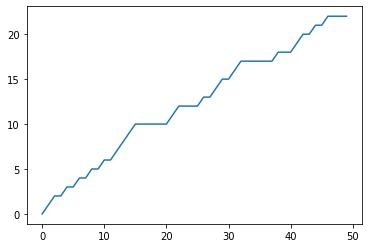

In [12]:
plt.plot(plot_maml)